In [1]:
# import the necessary modules

import networkx as nx
import blockmodeling as bm
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.cluster.hierarchy as sch
import pandas as pd

In [2]:
# Specify the sociomatrix file you want to work with
#datafile="bm_examples/bakerCitation_el2.txt"
#datafile="bm_examples/simpleCP_el2.txt"
#datafile="bm_examples/trivial6actor_el2.txt"
datafile="bm_examples/LittleLeagueTI_el2.txt"

# Read edgelist from file, directional and binary
G = nx.read_adjlist(datafile,create_using=nx.DiGraph())

# Convert to matrix (numpy.matrix)
mat=nx.adjacency_matrix(G).todense()

# Extract the node labels into a list - useful later on
nodelabels=list(G.nodes())

# Display the sociomatrix
bm.displaySociomatrix(mat,nodelabels)

0 1 1 1 0 0 0 0 0 0 0 0 0	Ron_1
1 0 1 0 0 1 0 0 0 0 0 0 0	Frank_3
1 1 0 0 1 0 0 0 0 0 0 0 0	Boyd_4
1 1 1 0 0 0 0 0 0 0 0 0 0	Tim_5
1 1 0 0 0 1 0 0 0 0 0 0 0	Tom_2
1 0 0 0 1 0 0 0 0 0 0 0 1	Darrin_11
0 0 0 1 0 0 0 1 1 0 0 0 0	John_6
1 0 0 0 0 0 1 0 0 0 0 0 1	Ben_12
0 0 0 1 0 0 1 0 0 0 0 0 0	Arnie_13
0 0 0 0 1 0 0 0 0 0 1 1 0	Jeff_7
0 0 0 0 1 0 0 0 0 1 0 1 0	Jay_8
0 0 0 0 1 0 0 0 0 1 1 0 0	Sandy_9
1 0 0 0 0 0 1 0 0 0 0 0 0	Jerry_10


/home/user/msTest/venv_jupyterhab/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/user/msTest/venv_jupyterhab/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


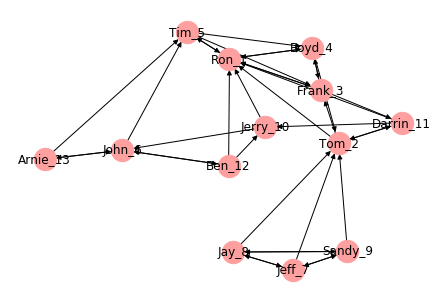

In [3]:
# Display the network (you might get a warning message the first time - then do it again)
nx.draw(G,with_labels=True,node_color='#FFA0A0', node_size=500)
plt.show()

In [4]:
# Calculate indirect structural equivalence (Hamming distances)
dist=bm.indirectSEhamming(mat) # Also works with bm.indirectSE(mat,method='hamming')

# or calculate correlation-based indirect structural equivalence instead
#corr=bm.indirectSEcorr(mat) # Also works with bm.indirectSE(mat,method='corr')
# As the clustering functionality here works for distances, we need to then convert correlations to distances
# I have added a function for this: corr2dist(mat) - so if you do the following:
#dist=bm.corr2dist(corr)
# ...you should have something that will work as we continue

In [ ]:
# Display the distance matrix if you want
#print(dist)

In [5]:
# In order to do hierarchical clustering on these distance values, this must first be converted to a condensed distance matrix
# For this, we use scipy.spatial.distance.squareform:

dist_cond = sc.spatial.distance.squareform(dist)

In [6]:
# When doing (agglomerative/bottom-up) hierarchical clustering, we can use one out of many different methods for clustering
# 'single-link' is typically NOT recommended; 'complete', 'average' and 'ward' are more common in this context

# Using the (non-weighted) average clustering approach, we create our clustering object
Z=sch.linkage(dist_cond, method='complete')

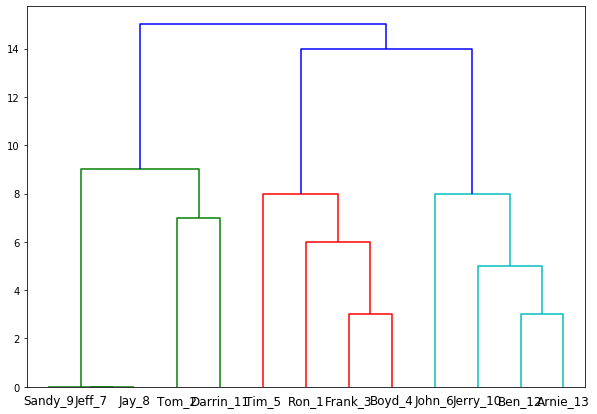

In [7]:
# Then we can plot the dendrogram for this particular hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(Z,labels=nodelabels) # ...using the nodelabels we extracted in the beginning
plt.show()

In [8]:
# The dendrogram should assist us in choosing a suitable cutoff in the dendrogram
# This cutoff will thus specify the number of positions our blockmodel will have,
# and which nodes/actors that will be part of different partitions


# We use the fcluster function to "cut" the dendrogram at a suitable level. First set that threshold/cutoff value:
threshold=10

partition = sch.fcluster(Z,threshold,'distance')

# This 'partition' object is a 1-dimensional array (numpy.ndarray), indicating (for each node) which position it belongs to

# Have a look at it:
print(partition)

[2 2 2 2 1 1 3 3 3 1 1 1 3]


In [9]:
# Check that you got the number of partitions that you wanted
len(np.unique(partition))

3

In [10]:
# An alternative (and better) way to store this partition is in the form of a dictionary, of lists
# In the blockmodeling library, I have created a function that generates such a dictionary, from your partition list

blockdict=bm.createBlockdict(partition)

# Display it and you will see
bm.displayBlockdict(blockdict,nodelabels)

Position 1: Tom_2, Darrin_11, Jeff_7, Jay_8, Sandy_9
Position 2: Ron_1, Frank_3, Boyd_4, Tim_5
Position 3: John_6, Ben_12, Arnie_13, Jerry_10


In [11]:
# Finally, given your original sociomatrix (max),
# the partition you have found (blockdict), and
# the nodelabels, you can display the final blockmodel

bm.displayBlockmodel(mat,blockdict,nodelabels)

0 1 0 0 0|1 1 0 0|0 0 0 0| 1 Tom_2 (4)
1 0 0 0 0|1 0 0 0|0 0 0 1| 1 Darrin_11 (5)
1 0 0 1 1|0 0 0 0|0 0 0 0| 1 Jeff_7 (9)
1 0 1 0 1|0 0 0 0|0 0 0 0| 1 Jay_8 (10)
1 0 1 1 0|0 0 0 0|0 0 0 0| 1 Sandy_9 (11)
--------------------------
0 0 0 0 0|0 1 1 1|0 0 0 0| 2 Ron_1 (0)
0 1 0 0 0|1 0 1 0|0 0 0 0| 2 Frank_3 (1)
1 0 0 0 0|1 1 0 0|0 0 0 0| 2 Boyd_4 (2)
0 0 0 0 0|1 1 1 0|0 0 0 0| 2 Tim_5 (3)
--------------------------
0 0 0 0 0|0 0 0 1|0 1 1 0| 3 John_6 (6)
0 0 0 0 0|1 0 0 0|1 0 0 1| 3 Ben_12 (7)
0 0 0 0 0|0 0 0 1|1 0 0 0| 3 Arnie_13 (8)
0 0 0 0 0|1 0 0 0|1 0 0 0| 3 Jerry_10 (12)
--------------------------


In [13]:
# To assist in interpreting this, I have created a function for
# calculating block densities. It returns a numpy ndarray, containing the
# block densities for the partition specified in blockdict
# This blockimage is sorted according to the indices of blockdict,
# i.e. following the same order as the blockmodel above

densityBI=bm.calcDensityBlockimage(mat,blockdict)

print(np.around(densityBI,decimals=2))

[[0.55 0.15 0.05]
 [0.1  0.83 0.  ]
 [0.   0.25 0.5 ]]


In [ ]:
# Values below 0.5 are thus closer to a null block
# and values above 0.5 are closer to a complete block

# But ideally, these values should be either close to zero or unity

In [ ]:
# The Les Miserables graph
G_lm = nx.les_miserables_graph()
mat_temp=nx.adjacency_matrix(G_lm).todense()

mat_lm=np.where(mat_temp > 0.5, 1, 0)

# Extract the node labels into a list - useful later on
nodelabels_lm=list(G_lm.nodes())

# Display the sociomatrix
bm.displaySociomatrix(mat_lm,nodelabels_lm)

In [ ]:
# Display the network (you might get a warning message the first time - then do it again)
nx.draw(G_lm,with_labels=True,node_color='#FFA0A0', node_size=500)
plt.show()

In [ ]:
dist_lm=bm.indirectSEhamming(mat_lm) # Also works with bm.indirectSE(mat,method='hamming')
dist_cond_lm = sc.spatial.distance.squareform(dist_lm)

In [ ]:
Z_lm_complete=sch.linkage(dist_cond_lm, method='complete')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z_lm_complete,labels=nodelabels_lm) # ...using the nodelabels we extracted in the beginning
plt.show()

In [ ]:
Z_lm_average=sch.linkage(dist_cond_lm, method='average')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z_lm_average,labels=nodelabels_lm) # ...using the nodelabels we extracted in the beginning
plt.show()

In [ ]:
Z_lm_ward=sch.linkage(dist_cond_lm, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z_lm_ward,labels=nodelabels_lm) # ...using the nodelabels we extracted in the beginning
plt.show()

In [ ]:
# Use Ward this time, cut at 60
partition_lm = sch.fcluster(Z_lm_ward,60,'distance')
# Check that you got the number of partitions that you wanted
len(np.unique(partition_lm))

In [ ]:
blockdict_lm=bm.createBlockdict(partition_lm)

# Display it and you will see
bm.displayBlockdict(blockdict_lm,nodelabels_lm)

In [ ]:
bm.displayBlockmodel(mat_lm,blockdict_lm,nodelabels_lm)

In [ ]:
densityBI_lm=bm.calcDensityBlockimage(mat_lm,blockdict_lm)

print(np.around(densityBI_lm,decimals=2))